In [47]:
import numpy as npy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as ndimage

In [48]:
# This function plots a colormap of inverted AVFoundation disparity map and ARKit absolute depth map
# The colors in the colormap for a single scenario (Photo 1, Photo 2, Photo 3, etc.) represent the same absolute depth value
# Note the AVFoundation camera and ARKit camera has a different field of view, so the photos don't look exactly the same
# Ideally the same object in the AVFoundation depth map vs ARKit depth map is the same color
def plot_and_print_comparison(disparity_map_path, disparity_image_path, absolute_map_path, absolute_image_path, disparity_figure_title_suffix = '', absolute_figure_title_suffix = ''):
    
    avfoundation_disparity_inverted = npy.load(disparity_map_path)
    avfoundation_disparity_inverted_image = mpimg.imread(disparity_image_path)
    # Need to make sure image is in correct orientation
    avfoundation_disparity_inverted_image = ndimage.rotate(avfoundation_disparity_inverted_image, 270, reshape=True)
    
    print("Printing disparity inverted:")
    print(avfoundation_disparity_inverted)
    print(f"Min value: {avfoundation_disparity_inverted.min()}")
    print(f"Max value: {avfoundation_disparity_inverted.max()}")
    print("\n")
    
    arkit_absolutedepth = npy.load(absolute_map_path)
    arkit_absolutedepth_image = mpimg.imread(absolute_image_path)
    print("Printing absolute depth map:")
    print(arkit_absolutedepth)
    print(f"Min value: {arkit_absolutedepth.min()}")
    print(f"Max value: {arkit_absolutedepth.max()}")
    
    smallest_depth_value = min(avfoundation_disparity_inverted.min(), arkit_absolutedepth.min())
    largest_depth_value = max(avfoundation_disparity_inverted.max(), arkit_absolutedepth.max())
    
    # AVFoundation disparity inverted plot
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig1.suptitle(f'Color map: AVFoundation disparity inverse{disparity_figure_title_suffix}\nColor map range is from {smallest_depth_value} to {largest_depth_value}')

    ax1.set_title('Color map of depth')
    ax1.set_xlabel('Pixel column')
    ax1.set_ylabel('Pixel row')
    ax1img = ax1.imshow(avfoundation_disparity_inverted, cmap="plasma", vmin=smallest_depth_value, vmax=largest_depth_value)
    fig1.colorbar(ax1img, ax = ax1)

    ax2.set_title('RGB image')
    ax2.set_xlabel('Pixel column')
    ax2.set_ylabel('Pixel row')
    ax2.imshow(avfoundation_disparity_inverted_image)

    fig1.tight_layout()
    
    # ARKit absolute depth plot
    fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2)
    fig2.suptitle(f'Color map: ARKit absolute depth{absolute_figure_title_suffix}')

    ax3.set_title('Color map of depth')
    ax3.set_xlabel('Pixel column')
    ax3.set_ylabel('Pixel row')
    ax3img = ax3.imshow(arkit_absolutedepth, cmap="plasma", vmin=smallest_depth_value, vmax=largest_depth_value)
    fig2.colorbar(ax3img, ax=ax3)

    ax4.set_title('RGB image')
    ax4.set_xlabel('Pixel column')
    ax4.set_ylabel('Pixel row')
    ax4.imshow(arkit_absolutedepth_image)

    fig2.tight_layout()
    
    

Printing disparity inverted:
[[0.96603775 0.96603775 0.96603775 ... 0.9799043  0.97803247 0.97803247]
 [0.96694994 0.9678639  0.9678639  ... 0.98178333 0.9808429  0.98178333]
 [0.9678639  0.969697   0.9706161  ... 0.9836695  0.9827255  0.9836695 ]
 ...
 [1.0694517  1.0694517  1.0700104  ... 1.0778947  1.0801687  1.0813094 ]
 [1.0694517  1.0700104  1.0711297  ... 1.0773277  1.0784624  1.0784624 ]
 [1.0694517  1.0705698  1.0716902  ... 1.0767612  1.0767612  1.0767612 ]]
Min value: 0.9472710490226746
Max value: 1.0847457647323608


Printing absolute depth map:
[[0.9272461  0.9213867  0.921875   ... 0.9560547  0.9482422  0.96728516]
 [0.9160156  0.9433594  0.93652344 ... 0.9448242  0.96240234 0.9296875 ]
 [0.9238281  0.9199219  0.9272461  ... 0.94921875 0.94433594 0.93408203]
 ...
 [1.0214844  1.0351562  1.0332031  ... 1.0703125  1.0634766  1.0664062 ]
 [1.0400391  1.0576172  1.0351562  ... 1.0712891  1.0634766  1.0673828 ]
 [1.0244141  1.03125    1.0361328  ... 1.0703125  1.0800781  1.074

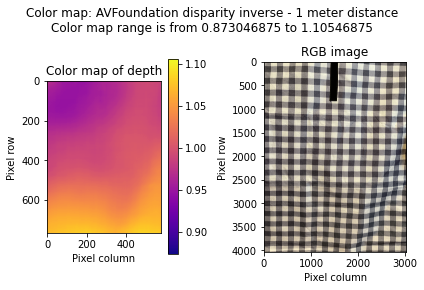

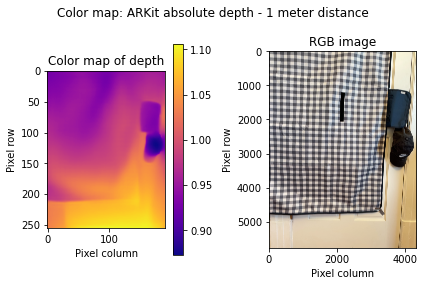

In [49]:
# Photo of flat wall 1 meter away
# Observations:
# Both inverted AVFoundation disparity map and ARKit absolute depth map look similar 
plot_and_print_comparison(
    'Photo1-1meterDistance/AVFoundationDisparityInverted/photo1-disparitymap_inverted.npy',
    'Photo1-1meterDistance/AVFoundationDisparityInverted/photo1-disparityimage.jpeg',
    'Photo1-1meterDistance/ARKitAbsoluteDepth/photo1-absolutedepthmap.npy',
    'Photo1-1meterDistance/ARKitAbsoluteDepth/photo1-absolute_image.jpeg',
    ' - 1 meter distance',
    ' - 1 meter distance'
)

Printing disparity inverted:
[[0.7596439  0.76077265 0.7613383  ... 0.75795704 0.75795704 0.75795704]
 [0.7613383  0.7619048  0.7624721  ... 0.75795704 0.75795704 0.75795704]
 [0.7624721  0.76304024 0.76304024 ... 0.75795704 0.75795704 0.75795704]
 ...
 [0.80948615 0.80948615 0.80948615 ... 0.80948615 0.80948615 0.80948615]
 [0.80948615 0.80948615 0.80948615 ... 0.80948615 0.80948615 0.80948615]
 [0.80948615 0.80948615 0.80948615 ... 0.80948615 0.80948615 0.80948615]]
Min value: 0.7573964595794678
Max value: 0.8094861507415771


Printing absolute depth map:
[[1.4853516 1.4833984 1.4541016 ... 1.4306641 1.3876953 1.3330078]
 [1.4638672 1.5087891 1.4882812 ... 1.4052734 1.4257812 1.4003906]
 [1.4716797 1.4609375 1.4746094 ... 1.4355469 1.4384766 1.4179688]
 ...
 [1.0625    1.078125  1.0761719 ... 1.1259766 1.1171875 1.1269531]
 [1.0751953 1.0957031 1.0751953 ... 1.1181641 1.1210938 1.1191406]
 [1.0732422 1.0791016 1.0703125 ... 1.1123047 1.1201172 1.1132812]]
Min value: 1.0625
Max value:

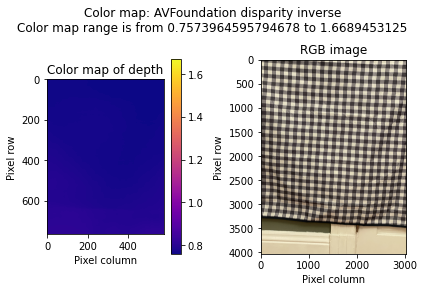

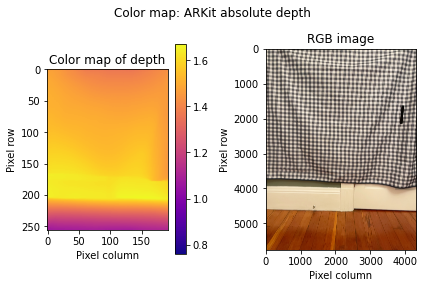

In [50]:
# Photo of flat wall 1.5 meters away
# Observations:
# Inverted AVFoundation disparity map was quite incorrect - however the min an max values seem to be pretty close, indicating it detected a flat surface
# ARKit absolute depth map is accurate
plot_and_print_comparison(
    'Photo8-1point5meterDistance/AVFoundationDisparityInverted/photo8-disparitymap_inverted.npy',
    'Photo8-1point5meterDistance/AVFoundationDisparityInverted/photo8-disparityimage.jpeg',
    'Photo8-1point5meterDistance/ARKitAbsoluteDepth/photo8-absolutedepthmap.npy',
    'Photo8-1point5meterDistance/ARKitAbsoluteDepth/photo8-absolute_image.jpeg',
)

Printing disparity inverted:
[[1.0864722  1.0893617  1.0893617  ... 1.06169    1.06169    1.06169   ]
 [1.0916845  1.0916845  1.0916845  ... 1.06169    1.06169    1.06169   ]
 [1.0940171  1.0940171  1.0940171  ... 1.06169    1.06169    1.06169   ]
 ...
 [1.1570622  1.1570622  1.1596829  ... 0.70914125 0.70914125 0.70914125]
 [1.1538029  1.1570622  1.1596829  ... 0.70914125 0.70914125 0.70914125]
 [1.1538029  1.1570622  1.1596829  ... 0.70914125 0.70914125 0.70914125]]
Min value: 0.7091412544250488
Max value: 1.1596828699111938


Printing absolute depth map:
[[1.4785156  1.4814453  1.4667969  ... 1.4677734  1.453125   1.4355469 ]
 [1.4726562  1.5009766  1.5029297  ... 1.4570312  1.4873047  1.4404297 ]
 [1.4882812  1.484375   1.484375   ... 1.4560547  1.4785156  1.4296875 ]
 ...
 [1.0712891  1.0888672  1.0859375  ... 0.53808594 0.55615234 0.54052734]
 [1.0810547  1.1044922  1.0839844  ... 0.53759766 0.5576172  0.5625    ]
 [1.0693359  1.0878906  1.0791016  ... 0.52734375 0.48168945 0.505

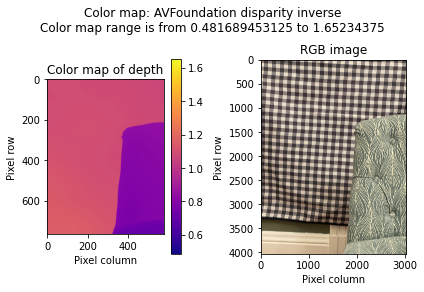

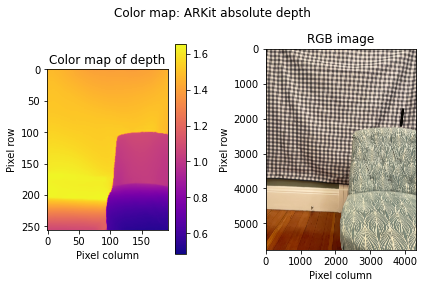

In [51]:
# Photo of flat wall 1.5 meters away with chair in scene
# Observations:
# Inverted AVFoundation disparity map definitely can pick up that the chair is closer, but the 
# The distance of the chair is similar in both AVFoundation and ARKit
# However the distance of the background wall with AVFoundation is incorrect
# ARKit is accurate
plot_and_print_comparison(
    'Photo9-1point5meterDistance-WithChair/AVFoundationDisparityInverted/photo9-disparitymap_inverted.npy',
    'Photo9-1point5meterDistance-WithChair/AVFoundationDisparityInverted/photo9-disparityimage.jpeg',
    'Photo9-1point5meterDistance-WithChair/ARKitAbsoluteDepth/photo9-absolutedepthmap.npy',
    'Photo9-1point5meterDistance-WithChair/ARKitAbsoluteDepth/photo9-absolute_image.jpeg',
)

Printing disparity inverted:
[[0.77575755 0.77693474 0.7781155  ... 0.7804878  0.77929986 0.7781155 ]
 [0.77752465 0.7787072  0.7798934  ... 0.7822766  0.78108317 0.78108317]
 [0.77752465 0.7781155  0.77929986 ... 0.78287464 0.7822766  0.7822766 ]
 ...
 [0.8126984  0.8126984  0.8126984  ... 0.76934636 0.76934636 0.76934636]
 [0.8126984  0.81334394 0.8139905  ... 0.76934636 0.76934636 0.76934636]
 [0.8120539  0.8139905  0.81528664 ... 0.76934636 0.76934636 0.76934636]]
Min value: 0.7693463563919067
Max value: 0.8304947018623352


Printing absolute depth map:
[[1.8779297 1.9042969 1.8574219 ... 2.0507812 2.0546875 2.0839844]
 [1.8769531 1.9394531 1.8935547 ... 2.0449219 2.0585938 2.0058594]
 [1.8798828 1.8964844 1.8916016 ... 2.0527344 2.0546875 2.0214844]
 ...
 [1.1357422 1.1503906 1.1484375 ... 1.171875  1.1630859 1.171875 ]
 [1.140625  1.1650391 1.1445312 ... 1.1601562 1.1650391 1.1630859]
 [1.1259766 1.1367188 1.1435547 ... 1.1542969 1.1601562 1.1523438]]
Min value: 1.1259765625
Max 

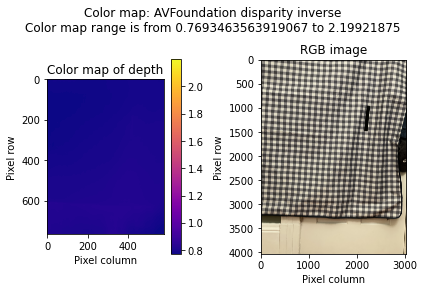

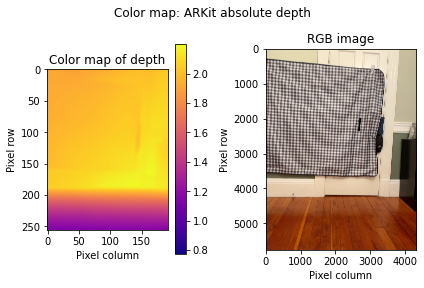

In [52]:
# Photo of flat wall 2 meters away with chair in scene
# Observations:
# Inverted AVFoundation disparity map was quite incorrect - however the min an max values seem to be pretty close, indicating it detected a flat surface
# ARKit absolute depth map is accurate
plot_and_print_comparison(
    'Photo15-2meterDistance/AVFoundationDisparityInverted/photo15-disparitymap_inverted.npy',
    'Photo15-2meterDistance/AVFoundationDisparityInverted/photo15-disparityimage.jpeg',
    'Photo15-2meterDistance/ARKitAbsoluteDepth/photo15-absolutedepthmap.npy',
    'Photo15-2meterDistance/ARKitAbsoluteDepth/photo15-absolute_image.jpeg',
)

Printing disparity inverted:
[[0.7804878  0.7787072  0.77752465 ... 0.7716654  0.7705041  0.7705041 ]
 [0.7804878  0.7787072  0.77752465 ... 0.7728302  0.7716654  0.7716654 ]
 [0.7804878  0.7787072  0.7787072  ... 0.7728302  0.7728302  0.7716654 ]
 ...
 [0.79318357 0.79318357 0.79318357 ... 0.558952   0.558952   0.558952  ]
 [0.79318357 0.79318357 0.79318357 ... 0.558952   0.558952   0.558952  ]
 [0.79318357 0.79318357 0.79318357 ... 0.558952   0.558952   0.558952  ]]
Min value: 0.5589519739151001
Max value: 0.7944142818450928


Printing absolute depth map:
[[1.890625  1.890625  1.8964844 ... 1.9375    1.9501953 1.9658203]
 [1.90625   1.9277344 1.9179688 ... 1.9384766 1.9560547 1.9091797]
 [1.8896484 1.890625  1.9091797 ... 1.9511719 1.9482422 1.9169922]
 ...
 [1.0986328 1.1113281 1.1103516 ... 1.1669922 1.1572266 1.1699219]
 [1.1044922 1.1269531 1.1064453 ... 1.15625   1.1650391 1.1601562]
 [1.0996094 1.0976562 1.1064453 ... 1.1503906 1.1591797 1.1533203]]
Min value: 1.02734375
Max va

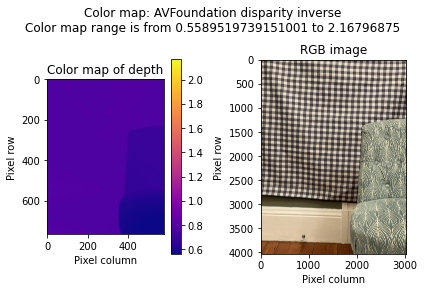

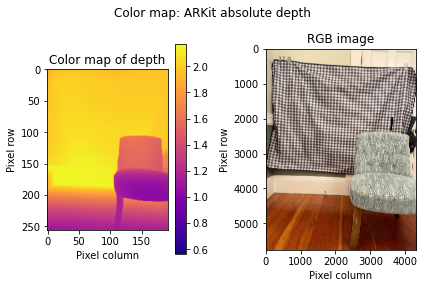

In [53]:
# Photo of flat wall 2 meters away with chair in scene
# Observations:
# AVFoundation performs poorly in measuring depth - it can distinguish between chair and wall though
# ARKit is accurate
plot_and_print_comparison(
    'Photo10-2meterDistance-WithChair/AVFoundationDisparityInverted/photo10-disparitymap_inverted.npy',
    'Photo10-2meterDistance-WithChair/AVFoundationDisparityInverted/photo10-disparityimage.jpeg',
    'Photo10-2meterDistance-WithChair/ARKitAbsoluteDepth/photo10-absolutedepthmap.npy',
    'Photo10-2meterDistance-WithChair/ARKitAbsoluteDepth/photo10-absolute_image.jpeg',
)

Printing disparity inverted:
[[0.67635405 0.67635405 0.6776969  ... 0.6348419  0.6348419  0.6348419 ]
 [0.67546177 0.67635405 0.6776969  ... 0.6348419  0.6348419  0.6348419 ]
 [0.67546177 0.67635405 0.6768011  ... 0.6348419  0.6348419  0.6348419 ]
 ...
 [0.7876923  0.78648233 0.78527606 ... 0.659369   0.659369   0.659369  ]
 [0.78951424 0.7876923  0.78648233 ... 0.6602192  0.6602192  0.6602192 ]
 [0.7907336  0.78951424 0.7876923  ... 0.6619263  0.6619263  0.6619263 ]]
Min value: 0.6332715153694153
Max value: 0.8904348015785217


Printing absolute depth map:
[[1.0908203  1.1132812  1.1328125  ... 1.0136719  0.99853516 1.0166016 ]
 [1.0791016  1.1240234  1.1279297  ... 1.0195312  1.0175781  0.98046875]
 [1.0898438  1.1035156  1.125      ... 1.0244141  1.0214844  0.99365234]
 ...
 [1.1025391  1.1240234  1.1318359  ... 1.0107422  1.         0.9970703 ]
 [1.1259766  1.1513672  1.1376953  ... 1.0107422  1.0009766  1.0009766 ]
 [1.1152344  1.1367188  1.1396484  ... 1.0087891  1.0117188  1.001

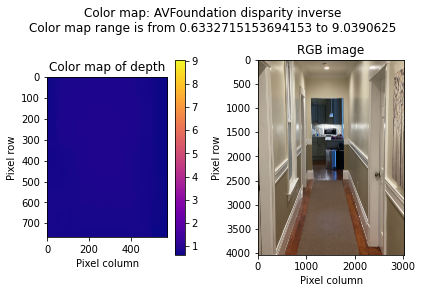

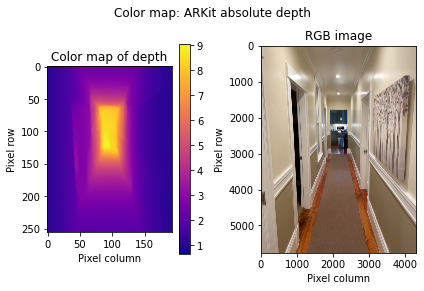

In [54]:
# Photo of indoor hallway
# AVFoundation performs very poorly
# ARKit is accurate
plot_and_print_comparison(
    'Photo3/AVFoundationDisparityInverted/photo3-disparitymap_inverted.npy',
    'Photo3/AVFoundationDisparityInverted/photo3-disparityimage.jpeg',
    'Photo3/ARKitAbsoluteDepth/photo3-absolutedepthmap.npy',
    'Photo3/ARKitAbsoluteDepth/photo3-absolute_image.jpeg',
)

Printing disparity inverted:
[[1.254902  1.2525994 1.2503053 ... 1.3255663 1.3229975 1.3204384]
 [1.2503053 1.2480195 1.2449847 ... 1.3281453 1.3255663 1.3229975]
 [1.2427185 1.2404603 1.2382104 ... 1.3307343 1.3281453 1.3255663]
 ...
 [1.0594931 1.0594931 1.0594931 ... 1.0594931 1.0594931 1.0594931]
 [1.0594931 1.0594931 1.0594931 ... 1.0594931 1.0594931 1.0594931]
 [1.0594931 1.0594931 1.0594931 ... 1.0594931 1.0594931 1.0594931]]
Min value: 1.059493064880371
Max value: 1.7933449745178223


Printing absolute depth map:
[[1.0957031 1.1044922 1.1240234 ... 1.1152344 1.1279297 1.1464844]
 [1.0791016 1.1210938 1.1240234 ... 1.1181641 1.1279297 1.1015625]
 [1.0878906 1.0996094 1.1191406 ... 1.1230469 1.1259766 1.1074219]
 ...
 [1.0400391 1.0625    1.0693359 ... 1.3945312 1.375     1.3808594]
 [1.0527344 1.0859375 1.078125  ... 1.3955078 1.3925781 1.3769531]
 [1.0478516 1.0791016 1.0800781 ... 1.3935547 1.4003906 1.3945312]]
Min value: 1.0400390625
Max value: 8.359375


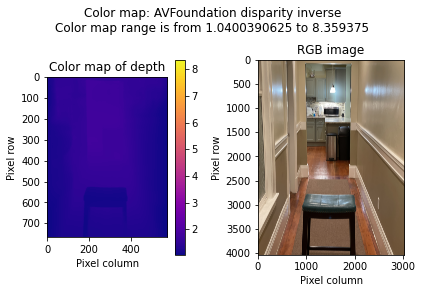

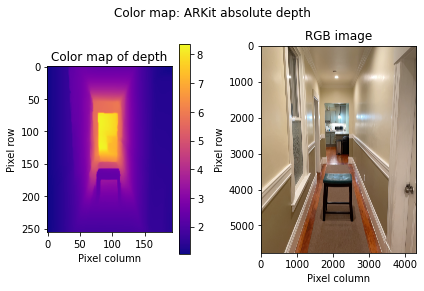

In [55]:
# Photo of indoor hallway with chair in the scene
# AVFoundation performs very poorly - it can distinguish the chair and the hallway - but the absolute values are quite off
# ARKit is accurate
plot_and_print_comparison(
    'Photo17/AVFoundationDisparityInverted/photo17-disparitymap_inverted.npy',
    'Photo17/AVFoundationDisparityInverted/photo17-disparityimage.jpeg',
    'Photo17/ARKitAbsoluteDepth/photo17-absolutedepthmap.npy',
    'Photo17/ARKitAbsoluteDepth/photo17-absolute_image.jpeg',
)

Printing disparity inverted:
[[1.1034483  1.1106291  1.117904   ... 0.54730093 0.54730093 0.54730093]
 [1.1034483  1.117904   1.117904   ... 0.54730093 0.54730093 0.54730093]
 [1.1034483  1.1106291  1.117904   ... 0.54730093 0.54730093 0.54730093]
 ...
 [0.4317032  0.4317032  0.4317032  ... 0.4317032  0.4317032  0.4317032 ]
 [0.4317032  0.4317032  0.4317032  ... 0.4317032  0.4317032  0.4317032 ]
 [0.4317032  0.4317032  0.4317032  ... 0.4317032  0.4317032  0.4317032 ]]
Min value: 0.43170320987701416
Max value: 1.2315093278884888


Printing absolute depth map:
[[0.47973633 0.47631836 0.4753418  ... 1.2060547  1.1816406  1.1376953 ]
 [0.47436523 0.4633789  0.46948242 ... 1.1591797  1.1748047  1.1962891 ]
 [0.47045898 0.48168945 0.47485352 ... 1.1806641  1.1728516  1.1845703 ]
 ...
 [0.328125   0.328125   0.32885742 ... 0.97558594 0.9692383  0.9760742 ]
 [0.33032227 0.34277344 0.33398438 ... 0.96875    0.9785156  0.9716797 ]
 [0.3251953  0.33398438 0.3388672  ... 0.9692383  0.97753906 0.97

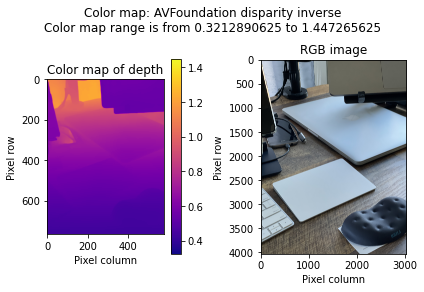

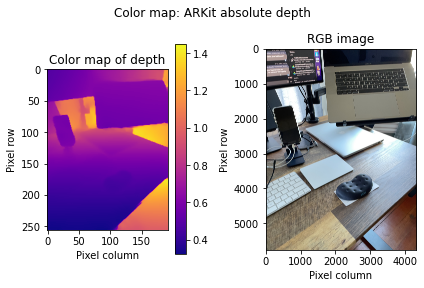

In [56]:
# Photo of desk
# AVFoundation and ARKit perform quite similarly
# Notice the same objects in the photo are the same/similar color in AVFoundation vs ARKit
plot_and_print_comparison(
    'Photo4/AVFoundationDisparityInverted/photo4-disparitymap_inverted.npy',
    'Photo4/AVFoundationDisparityInverted/photo4-disparityimage.jpeg',
    'Photo4/ARKitAbsoluteDepth/photo4-absolutedepthmap.npy',
    'Photo4/ARKitAbsoluteDepth/photo4-absolute_image.jpeg',
)

Printing disparity inverted:
[[1.022977  1.022977  1.022977  ... 1.2618607 1.2728403 1.2728403]
 [1.022977  1.022977  1.022977  ... 1.2728403 1.2728403 1.2728403]
 [1.022977  1.022977  1.022977  ... 1.2728403 1.2728403 1.2728403]
 ...
 [0.3990647 0.3990647 0.3990647 ... 0.3990647 0.3990647 0.3990647]
 [0.3990647 0.3990647 0.3990647 ... 0.3990647 0.3990647 0.3990647]
 [0.3990647 0.3990647 0.3990647 ... 0.3990647 0.3990647 0.3990647]]
Min value: 0.39906468987464905
Max value: 1.3187379837036133


Printing absolute depth map:
[[1.3828125  1.3818359  1.4023438  ... 1.4882812  1.4882812  1.515625  ]
 [1.40625    1.4189453  1.4208984  ... 1.4794922  1.5        1.4677734 ]
 [1.3916016  1.4003906  1.4140625  ... 1.4931641  1.4892578  1.4667969 ]
 ...
 [0.26611328 0.26757812 0.2668457  ... 0.25732422 0.26098633 0.26513672]
 [0.26660156 0.28027344 0.2692871  ... 0.25854492 0.26489258 0.27001953]
 [0.26391602 0.2685547  0.27441406 ... 0.25317383 0.24047852 0.25952148]]
Min value: 0.240478515625
M

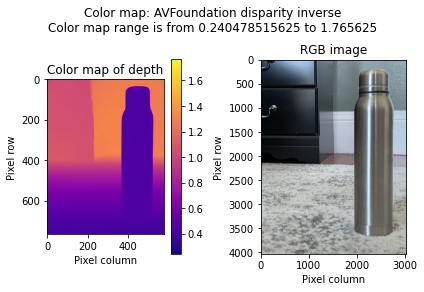

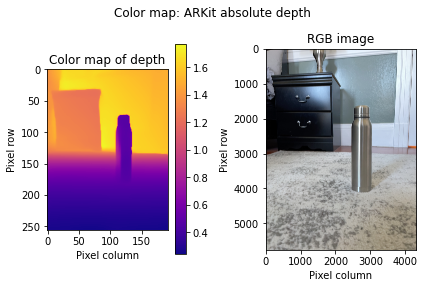

In [57]:
# Photo of bottle on bedroom floor
# AVFoundation does quite a good job in getting depth
# ARKit is accurate
plot_and_print_comparison(
    'Photo5/AVFoundationDisparityInverted/photo5-disparitymap_inverted.npy',
    'Photo5/AVFoundationDisparityInverted/photo5-disparityimage.jpeg',
    'Photo5/ARKitAbsoluteDepth/photo5-absolutedepthmap.npy',
    'Photo5/ARKitAbsoluteDepth/photo5-absolute_image.jpeg',
)

Printing disparity inverted:
[[1.9015784 1.9015784 1.9015784 ... 1.1271327 1.1271327 1.1271327]
 [1.9015784 1.9015784 1.9015784 ... 1.1271327 1.1271327 1.1271327]
 [1.9015784 1.9015784 1.9015784 ... 1.1271327 1.1271327 1.1289967]
 ...
 [1.1358846 1.1333703 1.1333703 ... 1.1166848 1.1166848 1.1185144]
 [1.1358846 1.1358846 1.1333703 ... 1.1142546 1.1166848 1.1166848]
 [1.1358846 1.1358846 1.1358846 ... 1.1142546 1.1142546 1.1166848]]
Min value: 1.04543137550354
Max value: 1.901578426361084


Printing absolute depth map:
[[14.515625  14.6484375 14.5859375 ...  1.6035156  1.6103516  1.6337891]
 [14.390625  14.828125  14.5546875 ...  1.6054688  1.6259766  1.5810547]
 [14.53125   14.4296875 14.5625    ...  1.6152344  1.6171875  1.5908203]
 ...
 [ 1.3632812  1.3710938  1.3720703 ...  1.2919922  1.28125    1.2939453]
 [ 1.3603516  1.3886719  1.3662109 ...  1.2861328  1.2919922  1.2851562]
 [ 1.3457031  1.3623047  1.3613281 ...  1.2841797  1.2900391  1.2851562]]
Min value: 1.28125
Max value: 1

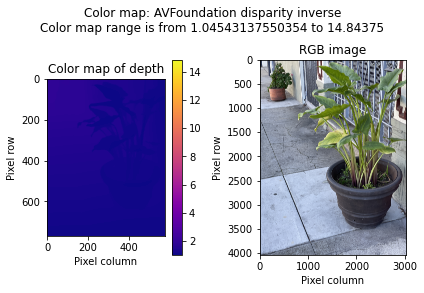

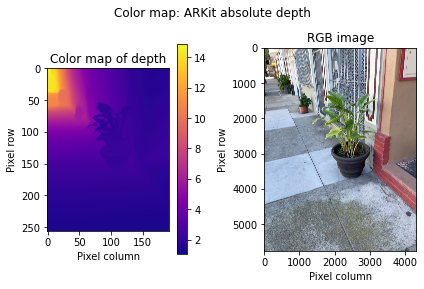

In [58]:
# Photo of plant on outdoor path
# Observations:
# AVFoundation gets the plant depth similar to ARKit - but it does not detect the path moving away
# ARKit is accurate
plot_and_print_comparison(
    'Photo6/AVFoundationDisparityInverted/photo6-disparitymap_inverted.npy',
    'Photo6/AVFoundationDisparityInverted/photo6-disparityimage.jpeg',
    'Photo6/ARKitAbsoluteDepth/photo6-absolutedepthmap.npy',
    'Photo6/ARKitAbsoluteDepth/photo6-absolute_image.jpeg',
)

Printing disparity inverted:
[[0.44214162 0.44099915 0.4413793  ... 0.46886447 0.46886447 0.46886447]
 [0.4429066  0.44214162 0.44214162 ... 0.4684355  0.46886447 0.46886447]
 [0.44214162 0.44176015 0.44176015 ... 0.46800733 0.4684355  0.4684355 ]
 ...
 [0.45269674 0.45269674 0.45349866 ... 0.4718894  0.4718894  0.4718894 ]
 [0.45269674 0.45269674 0.45349866 ... 0.4718894  0.4718894  0.4718894 ]
 [0.45269674 0.45229682 0.4539007  ... 0.4718894  0.4718894  0.4718894 ]]
Min value: 0.4361158311367035
Max value: 0.4731977880001068


Printing absolute depth map:
[[0.75146484 0.74658203 0.7470703  ... 1.0263672  1.0185547  1.0488281 ]
 [0.7402344  0.76171875 0.75683594 ... 1.0273438  1.0439453  1.0087891 ]
 [0.74658203 0.74902344 0.7529297  ... 1.0302734  1.0322266  1.0185547 ]
 ...
 [0.8564453  0.8696289  0.8671875  ... 1.2324219  1.2246094  1.234375  ]
 [0.8696289  0.91748047 0.87841797 ... 1.2324219  1.234375   1.2324219 ]
 [0.89208984 0.8745117  0.8696289  ... 1.2333984  1.2412109  1.241

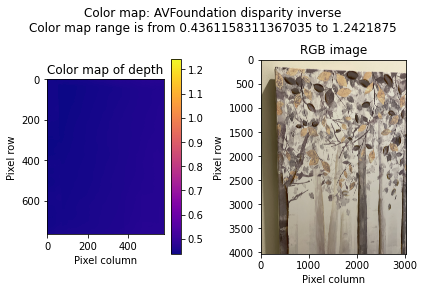

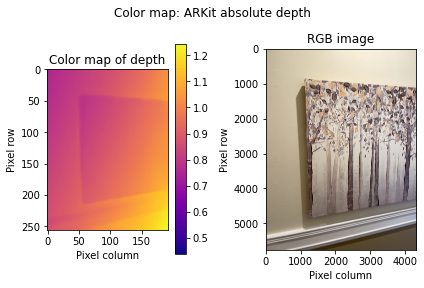

In [59]:
# Photo of plant on outdoor path
# Observations:
# AVFoundation perform very poorly
# ARKit is accurate
plot_and_print_comparison(
    'Photo7/AVFoundationDisparityInverted/photo7-disparitymap_inverted.npy',
    'Photo7/AVFoundationDisparityInverted/photo7-disparityimage.jpeg',
    'Photo7/ARKitAbsoluteDepth/photo7-absolutedepthmap.npy',
    'Photo7/ARKitAbsoluteDepth/photo7-absolute_image.jpeg',
)

Printing disparity inverted:
[[0.6781457  0.67724866 0.6759076  ... 0.52006096 0.52006096 0.52085453]
 [0.67724866 0.67724866 0.6759076  ... 0.52006096 0.52006096 0.52085453]
 [0.6759076  0.6759076  0.6759076  ... 0.52006096 0.52006096 0.52006096]
 ...
 [0.7201125  0.7201125  0.7201125  ... 0.5036891  0.5036891  0.50418514]
 [0.7201125  0.7201125  0.7201125  ... 0.5036891  0.5036891  0.50418514]
 [0.7201125  0.7201125  0.7201125  ... 0.5036891  0.5036891  0.50418514]]
Min value: 0.4876190423965454
Max value: 0.7216349244117737


Printing absolute depth map:
[[1.5683594 1.5507812 1.5429688 ... 1.8076172 1.8173828 1.8417969]
 [1.5527344 1.5859375 1.5673828 ... 1.8037109 1.8212891 1.7724609]
 [1.5429688 1.5605469 1.5517578 ... 1.8095703 1.8105469 1.7841797]
 ...
 [1.5146484 1.5439453 1.5439453 ... 1.5214844 1.5048828 1.5136719]
 [1.5175781 1.5947266 1.546875  ... 1.5244141 1.5234375 1.5029297]
 [1.4589844 1.546875  1.5253906 ... 1.5126953 1.5224609 1.515625 ]]
Min value: 0.84912109375
Max

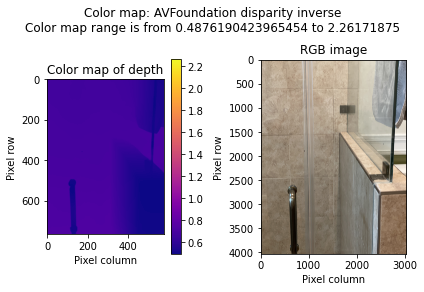

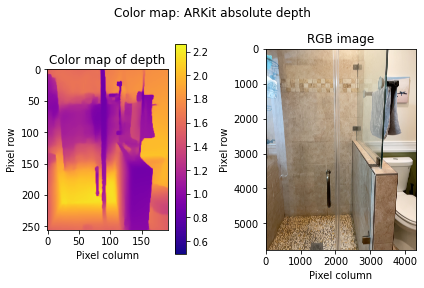

In [60]:
# Photo of bathroom shower glass
# Observations:
# AVFoundation detects that the back shower wall is further away than the door handle - it seems to ignore the glass
# ARKit ignores some parts of the glass and gets depth to the back shower wall
plot_and_print_comparison(
    'Photo13/AVFoundationDisparityInverted/photo13-disparitymap_inverted.npy',
    'Photo13/AVFoundationDisparityInverted/photo13-disparityimage.jpeg',
    'Photo13/ARKitAbsoluteDepth/photo13-absolutedepthmap.npy',
    'Photo13/ARKitAbsoluteDepth/photo13-absolute_image.jpeg',
)

Printing disparity inverted:
[[0.73881674 0.73881674 0.7404194  ... 0.5535135  0.53894734 0.52674896]
 [0.73881674 0.73881674 0.7404194  ... 0.5526174  0.53809774 0.52006096]
 [0.73881674 0.73881674 0.73881674 ... 0.5397997  0.5259373  0.50793654]
 ...
 [0.6989761  0.6989761  0.6975477  ... 0.6543131  0.6543131  0.6530612 ]
 [0.6989761  0.6989761  0.6975477  ... 0.6543131  0.6543131  0.6543131 ]
 [0.6989761  0.6989761  0.6975477  ... 0.6555698  0.6555698  0.6555698 ]]
Min value: 0.48530805110931396
Max value: 0.7810831665992737


Printing absolute depth map:
[[0.57666016 0.57958984 0.5727539  ... 0.59277344 0.63916016 0.54785156]
 [0.5698242  0.5859375  0.5761719  ... 0.61083984 0.62646484 0.6220703 ]
 [0.57373047 0.578125   0.57910156 ... 0.61328125 0.6225586  0.62597656]
 ...
 [0.6328125  0.64404297 0.640625   ... 0.6533203  0.6538086  0.6538086 ]
 [0.6508789  0.6713867  0.6479492  ... 0.6567383  0.65283203 0.66015625]
 [0.6279297  0.63623047 0.64453125 ... 0.6640625  0.66845703 0.67

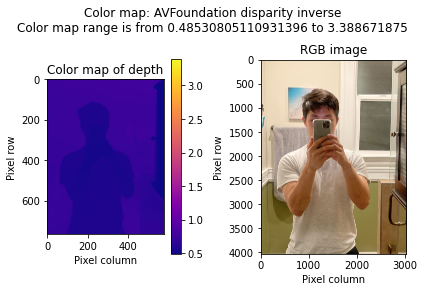

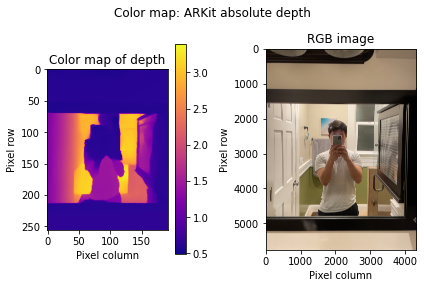

In [61]:
# Photo of mirror
# Observations:
# AVFoundation seems to distinguish between the human and the background, even though the mirror is at a fixed distance away
# ARKit seems to measure the objects in the mirror as if they are further back than the wall the mirror is on
plot_and_print_comparison(
    'Photo14/AVFoundationDisparityInverted/photo14-disparitymap_inverted.npy',
    'Photo14/AVFoundationDisparityInverted/photo14-disparityimage.jpeg',
    'Photo14/ARKitAbsoluteDepth/photo14-absolutedepthmap.npy',
    'Photo14/ARKitAbsoluteDepth/photo14-absolute_image.jpeg',
)